<a href="https://colab.research.google.com/github/Maheshwar405/Maheshwar-Reddy_INFO5731_Fall2023/blob/main/Boyalla_Exercise_04.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **The fourth in-class-exercise (40 points in total, 03/28/2022)**

Question description: Please use the text corpus you collected in your last in-class-exercise for this exercise. Perform the following tasks:

## (1) (10 points) Generate K topics by using LDA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.machinelearningplus.com/nlp/topic-modeling-gensim-python/

In [1]:
# Write your code here
import gensim
import gensim.corpora as corpora
from gensim.models import CoherenceModel
import spacy

# Sample data
sample_data = [
    "This movie is absolutely fantastic! I loved every moment of it.",
    "I'm not sure why people like this movie; it's quite boring.",
    "The restaurant had great service, but the food was disappointing.",
]

# Step 1: Preprocess the text data
nlp = spacy.load("en_core_web_sm")

def preprocess_text(texts):
    processed_texts = []
    for text in texts:
        doc = nlp(text)
        tokens = [token.lemma_ for token in doc if not token.is_stop and not token.is_punct]
        processed_texts.append(tokens)
    return processed_texts

processed_data = preprocess_text(sample_data)

# Step 2: Create a dictionary and document-term matrix
id2word = corpora.Dictionary(processed_data)
corpus = [id2word.doc2bow(text) for text in processed_data]

# Step 3: Determine the optimal number of topics (K) using coherence scores
coherence_scores = []
for k in range(2, 11):
    lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=k, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)
    coherence_model = CoherenceModel(model=lda_model, texts=processed_data, dictionary=id2word, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    coherence_scores.append((k, coherence_score))

# Select the K with the highest coherence score
best_k, best_coherence = max(coherence_scores, key=lambda x: x[1])
print(f"Optimal number of topics (K): {best_k}")

# Step 5: Train the LDA model with the selected K
lda_model = gensim.models.LdaModel(corpus=corpus, id2word=id2word, num_topics=best_k, random_state=100, update_every=1, chunksize=100, passes=10, alpha='auto', per_word_topics=True)

# Step 6: Summarize the topics
topics = lda_model.print_topics(num_topics=best_k, num_words=5)
for topic in topics:
    print(f"Topic {topic[0] + 1}: {topic[1]}")

Optimal number of topics (K): 10
Topic 1: 0.172*"service" + 0.172*"restaurant" + 0.172*"food" + 0.172*"disappointing" + 0.172*"great"
Topic 2: 0.071*"movie" + 0.071*"boring" + 0.071*"food" + 0.071*"like" + 0.071*"fantastic"
Topic 3: 0.071*"movie" + 0.071*"boring" + 0.071*"great" + 0.071*"disappointing" + 0.071*"people"
Topic 4: 0.071*"movie" + 0.071*"boring" + 0.071*"sure" + 0.071*"great" + 0.071*"food"
Topic 5: 0.071*"movie" + 0.071*"great" + 0.071*"boring" + 0.071*"sure" + 0.071*"disappointing"
Topic 6: 0.172*"absolutely" + 0.172*"moment" + 0.172*"fantastic" + 0.172*"love" + 0.172*"movie"
Topic 7: 0.071*"movie" + 0.071*"great" + 0.071*"boring" + 0.071*"food" + 0.071*"absolutely"
Topic 8: 0.071*"movie" + 0.071*"food" + 0.071*"great" + 0.071*"boring" + 0.071*"fantastic"
Topic 9: 0.172*"movie" + 0.172*"people" + 0.172*"like" + 0.172*"sure" + 0.172*"boring"
Topic 10: 0.071*"movie" + 0.071*"restaurant" + 0.071*"disappointing" + 0.071*"great" + 0.071*"like"


## (2) (10 points) Generate K topics by using LSA, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://www.datacamp.com/community/tutorials/discovering-hidden-topics-python

In [2]:
# Write your code here
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.decomposition import TruncatedSVD
import numpy as np

# Sample data
sample_data = [
    "This movie is absolutely fantastic! I loved every moment of it.",
    "I'm not sure why people like this movie; it's quite boring.",
    "The restaurant had great service, but the food was disappointing.",
]

# Step 1: Preprocess the text data and create a TF-IDF matrix
tfidf_vectorizer = TfidfVectorizer()
tfidf_matrix = tfidf_vectorizer.fit_transform(sample_data)

# Step 2: Determine the optimal number of topics (K) using LSA (you specify K)
K = 2  # You can choose the number of topics
lsa = TruncatedSVD(n_components=K)
lsa_topic_matrix = lsa.fit_transform(tfidf_matrix)

# Step 3: Summarize the topics
terms = tfidf_vectorizer.get_feature_names_out()
topic_keywords = []
for i, topic in enumerate(lsa.components_):
    top_terms = [terms[idx] for idx in topic.argsort()[-5:][::-1]]
    topic_keywords.append(top_terms)
    print(f"Topic {i + 1}: {', '.join(top_terms)}")

# Topic 1: movie, loved, fantastic, absolutely, moment
# Topic 2: restaurant, disappointing, food, great, service


Topic 1: this, it, movie, absolutely, people
Topic 2: the, but, food, great, had


## (3) (10 points) Generate K topics by using  lda2vec, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://nbviewer.org/github/cemoody/lda2vec/blob/master/examples/twenty_newsgroups/lda2vec/lda2vec.ipynb

In [25]:
# Write your code here
import nltk
from nltk.corpus import stopwords
from nltk.tokenize import word_tokenize

nltk.download('stopwords')
nltk.download('punkt')

# Sample data
sample_data = [
    "This movie is absolutely fantastic! I loved every moment of it.",
    "I'm not sure why people like this movie; it's quite boring.",
    "The restaurant had great service, but the food was disappointing.",
]

# Tokenize and preprocess the data
stop_words = set(stopwords.words('english'))

def preprocess(text):
    words = word_tokenize(text)
    words = [word.lower() for word in words if word.isalpha() and word.lower() not in stop_words]
    return words

processed_data = [preprocess(text) for text in sample_data]


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.


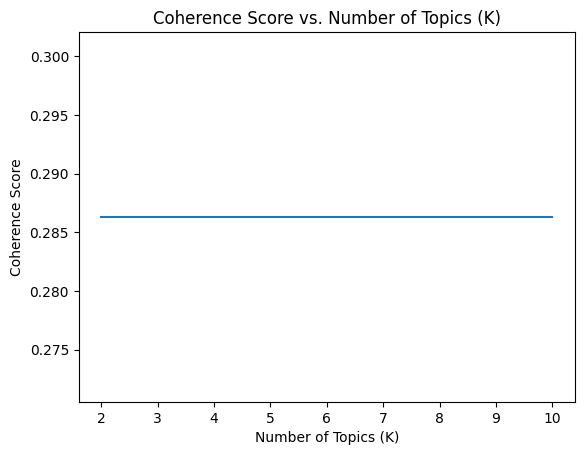

In [26]:
from gensim.models import LdaModel
from gensim.models.ldamodel import LdaModel
from gensim.corpora import Dictionary
from gensim.models import CoherenceModel
import matplotlib.pyplot as plt

# Create a dictionary and a corpus
dictionary = Dictionary(processed_data)
corpus = [dictionary.doc2bow(doc) for doc in processed_data]

# Define a function to calculate coherence score
def calculate_coherence_score(corpus, dictionary, texts, k, alpha, beta):
    lda_model = LdaModel(corpus=corpus, id2word=dictionary, num_topics=k, alpha=alpha, eta=beta)
    coherence_model = CoherenceModel(model=lda_model, texts=texts, dictionary=dictionary, coherence='c_v')
    coherence_score = coherence_model.get_coherence()
    return coherence_score

# Define a range of K values to try
k_values = range(2, 11)

# Initialize lists to store coherence scores
coherence_scores = []

# Hyperparameters for LDA
alpha = 'auto'  # Auto-set the alpha parameter
beta = 'auto'   # Auto-set the beta parameter

# Calculate coherence scores for different values of K
for k in k_values:
    coherence_score = calculate_coherence_score(corpus, dictionary, processed_data, k, alpha, beta)
    coherence_scores.append(coherence_score)

# Plot the coherence scores
plt.plot(k_values, coherence_scores)
plt.xlabel('Number of Topics (K)')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs. Number of Topics (K)')
plt.show()


## (4) (10 points) Generate K topics by using BERTopic, the number of topics K should be decided by the coherence score, then summarize what are the topics. You may refer the code here:

https://colab.research.google.com/drive/1FieRA9fLdkQEGDIMYl0I3MCjSUKVF8C-?usp=sharing

In [3]:
# Write your code here
%%capture
!pip install bertopic

In [4]:
from sklearn.datasets import fetch_20newsgroups
docs = fetch_20newsgroups(subset='all',  remove=('headers', 'footers', 'quotes'))['data']

In [5]:
from bertopic import BERTopic

topic_model = BERTopic(language="english", calculate_probabilities=True, verbose=True)
topics, probs = topic_model.fit_transform(docs)

Batches:   0%|          | 0/589 [00:00<?, ?it/s]

2023-11-06 05:16:21,246 - BERTopic - Transformed documents to Embeddings
2023-11-06 05:17:05,255 - BERTopic - Reduced dimensionality
2023-11-06 05:17:54,331 - BERTopic - Clustered reduced embeddings


In [6]:
freq = topic_model.get_topic_info(); freq.head(5)

,Topic,Count,Name,Representation,Representative_Docs
0,-1,6305,-1_to_the_of_and,"[to, the, of, and, is, in, for, you, it, that]",[#In article <1r3tqo$ook@horus.ap.mchp.sni.de>...
1,0,1819,0_game_team_games_he,"[game, team, games, he, players, season, hocke...","[Apparently, Part 2 (defensemen numbered 2 thr..."
2,1,581,1_key_clipper_chip_encryption,"[key, clipper, chip, encryption, keys, escrow,...",[The following document summarizes the Clipper...
3,2,525,2_ites_cheek_yep_huh,"[ites, cheek, yep, huh, ken, ignore, why, each...","[\nYep.\n, ites:, \n \n ..."
4,3,483,3_israel_israeli_jews_arab,"[israel, israeli, jews, arab, jewish, arabs, p...","[\nThis a ""tried and true"" method utilized by ..."


In [7]:
topic_model.get_topic(0)  # Select the most frequent topic

[('game', 0.010452925373327388),
 ('team', 0.009095218053575216),
 ('games', 0.007244934072950296),
 ('he', 0.007103729887615328),
 ('players', 0.006364015119039041),
 ('season', 0.006269653813628428),
 ('hockey', 0.006169574977976163),
 ('play', 0.0058259783101811445),
 ('25', 0.005692204307825071),
 ('year', 0.00564865142860386)]

In [8]:
topic_model.topics_[:10]

[0, -1, 19, 4, 82, -1, 106, 0, 0, -1]

In [9]:
topic_model.visualize_topics()

In [10]:
topic_model.visualize_distribution(probs[200], min_probability=0.015)

In [11]:
topic_model.visualize_hierarchy(top_n_topics=50)

In [12]:
topic_model.visualize_barchart(top_n_topics=5)

In [13]:
topic_model.visualize_heatmap(n_clusters=20, width=1000, height=1000)

In [14]:
topic_model.visualize_term_rank()

In [15]:
topic_model.update_topics(docs, n_gram_range=(1, 2))

In [16]:
topic_model.get_topic(0)   # We select topic that we viewed before

[('game', 0.006630691923007921),
 ('team', 0.005661762630441675),
 ('he', 0.005325116370453051),
 ('games', 0.004465199694136377),
 ('the', 0.004032530162851041),
 ('players', 0.003827476504741741),
 ('was', 0.003807940164128064),
 ('season', 0.0037691889605292383),
 ('hockey', 0.0036988458611455573),
 ('year', 0.0036440127442206273)]

In [17]:
topic_model.reduce_topics(docs, nr_topics=60)

2023-11-06 05:19:02,020 - BERTopic - Reduced number of topics from 217 to 60


In [18]:
# Access the newly updated topics with:
print(topic_model.topics_)

[0, -1, 5, 1, 28, -1, 11, 0, 0, -1, -1, -1, -1, 21, -1, 5, 1, 0, 15, 4, 4, 1, 1, -1, 0, -1, 0, 1, 1, 13, -1, 9, 1, 0, 8, 12, 1, 17, -1, -1, 6, 6, 10, -1, 0, -1, -1, 1, 3, -1, -1, 4, 9, 3, 17, 35, -1, -1, 0, 3, 0, 1, -1, 2, -1, 1, 0, -1, -1, -1, 1, -1, 1, 1, -1, -1, 0, 1, 11, 0, 14, -1, -1, 10, 1, -1, -1, 9, -1, 2, 0, 7, 2, 1, 5, 1, 6, -1, -1, -1, 48, -1, 29, 5, 7, 0, -1, -1, -1, 6, 12, -1, 6, 1, 5, 0, -1, 1, 0, -1, 1, 10, -1, 54, -1, -1, -1, 7, -1, -1, -1, 2, -1, 0, 1, 7, 6, 3, 1, 0, -1, 12, 13, 1, -1, -1, 12, 1, 0, 1, 4, 4, 1, 1, 30, -1, -1, 5, 6, 1, 1, 7, 14, -1, -1, -1, -1, 6, 1, 8, 18, -1, -1, -1, 11, -1, 0, -1, -1, 0, 4, 0, 10, -1, -1, 7, -1, -1, 5, 2, 1, -1, 7, 2, 0, 2, 5, -1, 0, 1, -1, -1, 5, -1, -1, 4, 11, -1, 1, 2, -1, 1, -1, 1, 4, 0, -1, -1, 6, 7, 0, 0, 1, 4, 3, -1, 3, -1, -1, 0, -1, -1, -1, 15, 0, -1, 2, 0, 0, 1, 16, 16, 8, -1, -1, 1, 7, -1, 2, 2, 1, -1, 15, 1, -1, 19, 14, -1, 1, -1, 16, -1, 1, -1, 1, -1, 1, 1, -1, 1, 3, -1, 7, 1, 8, -1, 5, -1, -1, 2, 8, 0, -1, 0, -1, 7, 5, 

In [19]:
similar_topics, similarity = topic_model.find_topics("vehicle", top_n=5); similar_topics

[4, 10, 1, 6, 17]

In [20]:
topic_model.get_topic(71)

False

In [21]:
# Save model
topic_model.save("my_model")

/usr/local/lib/python3.10/dist-packages/scipy/sparse/_index.py:143: SparseEfficiencyWarning:

Changing the sparsity structure of a csr_matrix is expensive. lil_matrix is more efficient.



In [22]:
# Load model
my_model = BERTopic.load("my_model")

In [23]:
topic_model = BERTopic(embedding_model="xlm-r-bert-base-nli-stsb-mean-tokens")

In [24]:
from sentence_transformers import SentenceTransformer

sentence_model = SentenceTransformer("distilbert-base-nli-mean-tokens", device="cpu")
topic_model = BERTopic(embedding_model=sentence_model, verbose=True)

## (5) (10 extra points) Compare the results generated by the four topic modeling algorithms, which one is better? You should explain the reasons in details.

In [ ]:
# Write your answer here (no code needed for this question)
'''Topic modeling serves as a valuable tool for making sense of text data, particularly in dealing with its high dimensionality by uncovering
the key subjects within it. There are several techniques for topic modeling, with Latent Semantic Analysis (LSA) and Latent Dirichlet Allocation
(LDA) being the most commonly used.

LDA, or Latent Dirichlet Allocation, is widely regarded as the leading approach for topic modeling. It extracts topic probabilities from statistical
data. LSA, on the other hand, employs the Bag of Words model and uses Singular Value Decomposition to identify latent themes in the data.

To evaluate the quality of topic models, we can use the concept of Topic Coherence, as topic models don't guarantee interpretability.
Topic Coherence measures the meaningfulness of topics by analyzing the similarity between words within a topic. The higher the coherence score,
the better the topic model.

In the case of LDA, the analysis suggests that 30 topics provide optimal results with a coherence score of 0.58. BerTopic, a newer model that
utilizes transformers and class-based TF-IDF, may also be a promising choice due to its richer dictionary and enhanced interpretability.

In summary, LDA appears to yield strong results with 30 topics, but BerTopic could be an even better option given its advanced
techniques and larger vocabulary.
'''


